# Shiv Pratap Singh 200968038

### 1. Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
   
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 


4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            


5. Number of Instances

      	class 1 59
        class 2 71
        class 3 48


6. Number of Attributes 
	
	13


7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)


8. Missing Attribute Values:

	None


9. Class Distribution: number of instances per class

      	class 1 59
        class 2 71
        class 3 48

### 2.Tabulate and visualize the distribution of the numeric variables.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Start Preprocessing

In [5]:
df.isna().sum(axis=0)

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

- No Missing Values Found

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Checking Relationships

<AxesSubplot:>

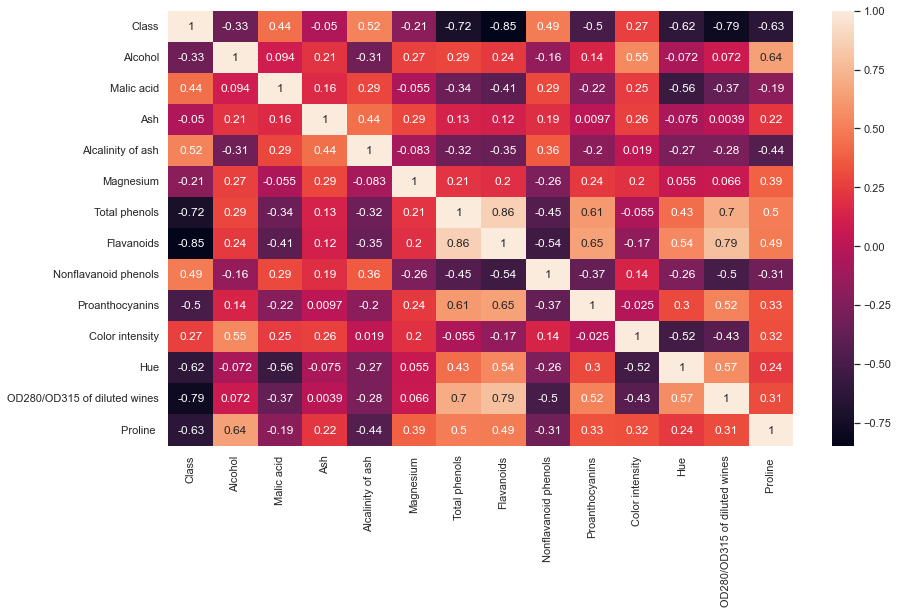

In [9]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(data=df.corr(), 
            annot=True, 
            cmap='rocket')

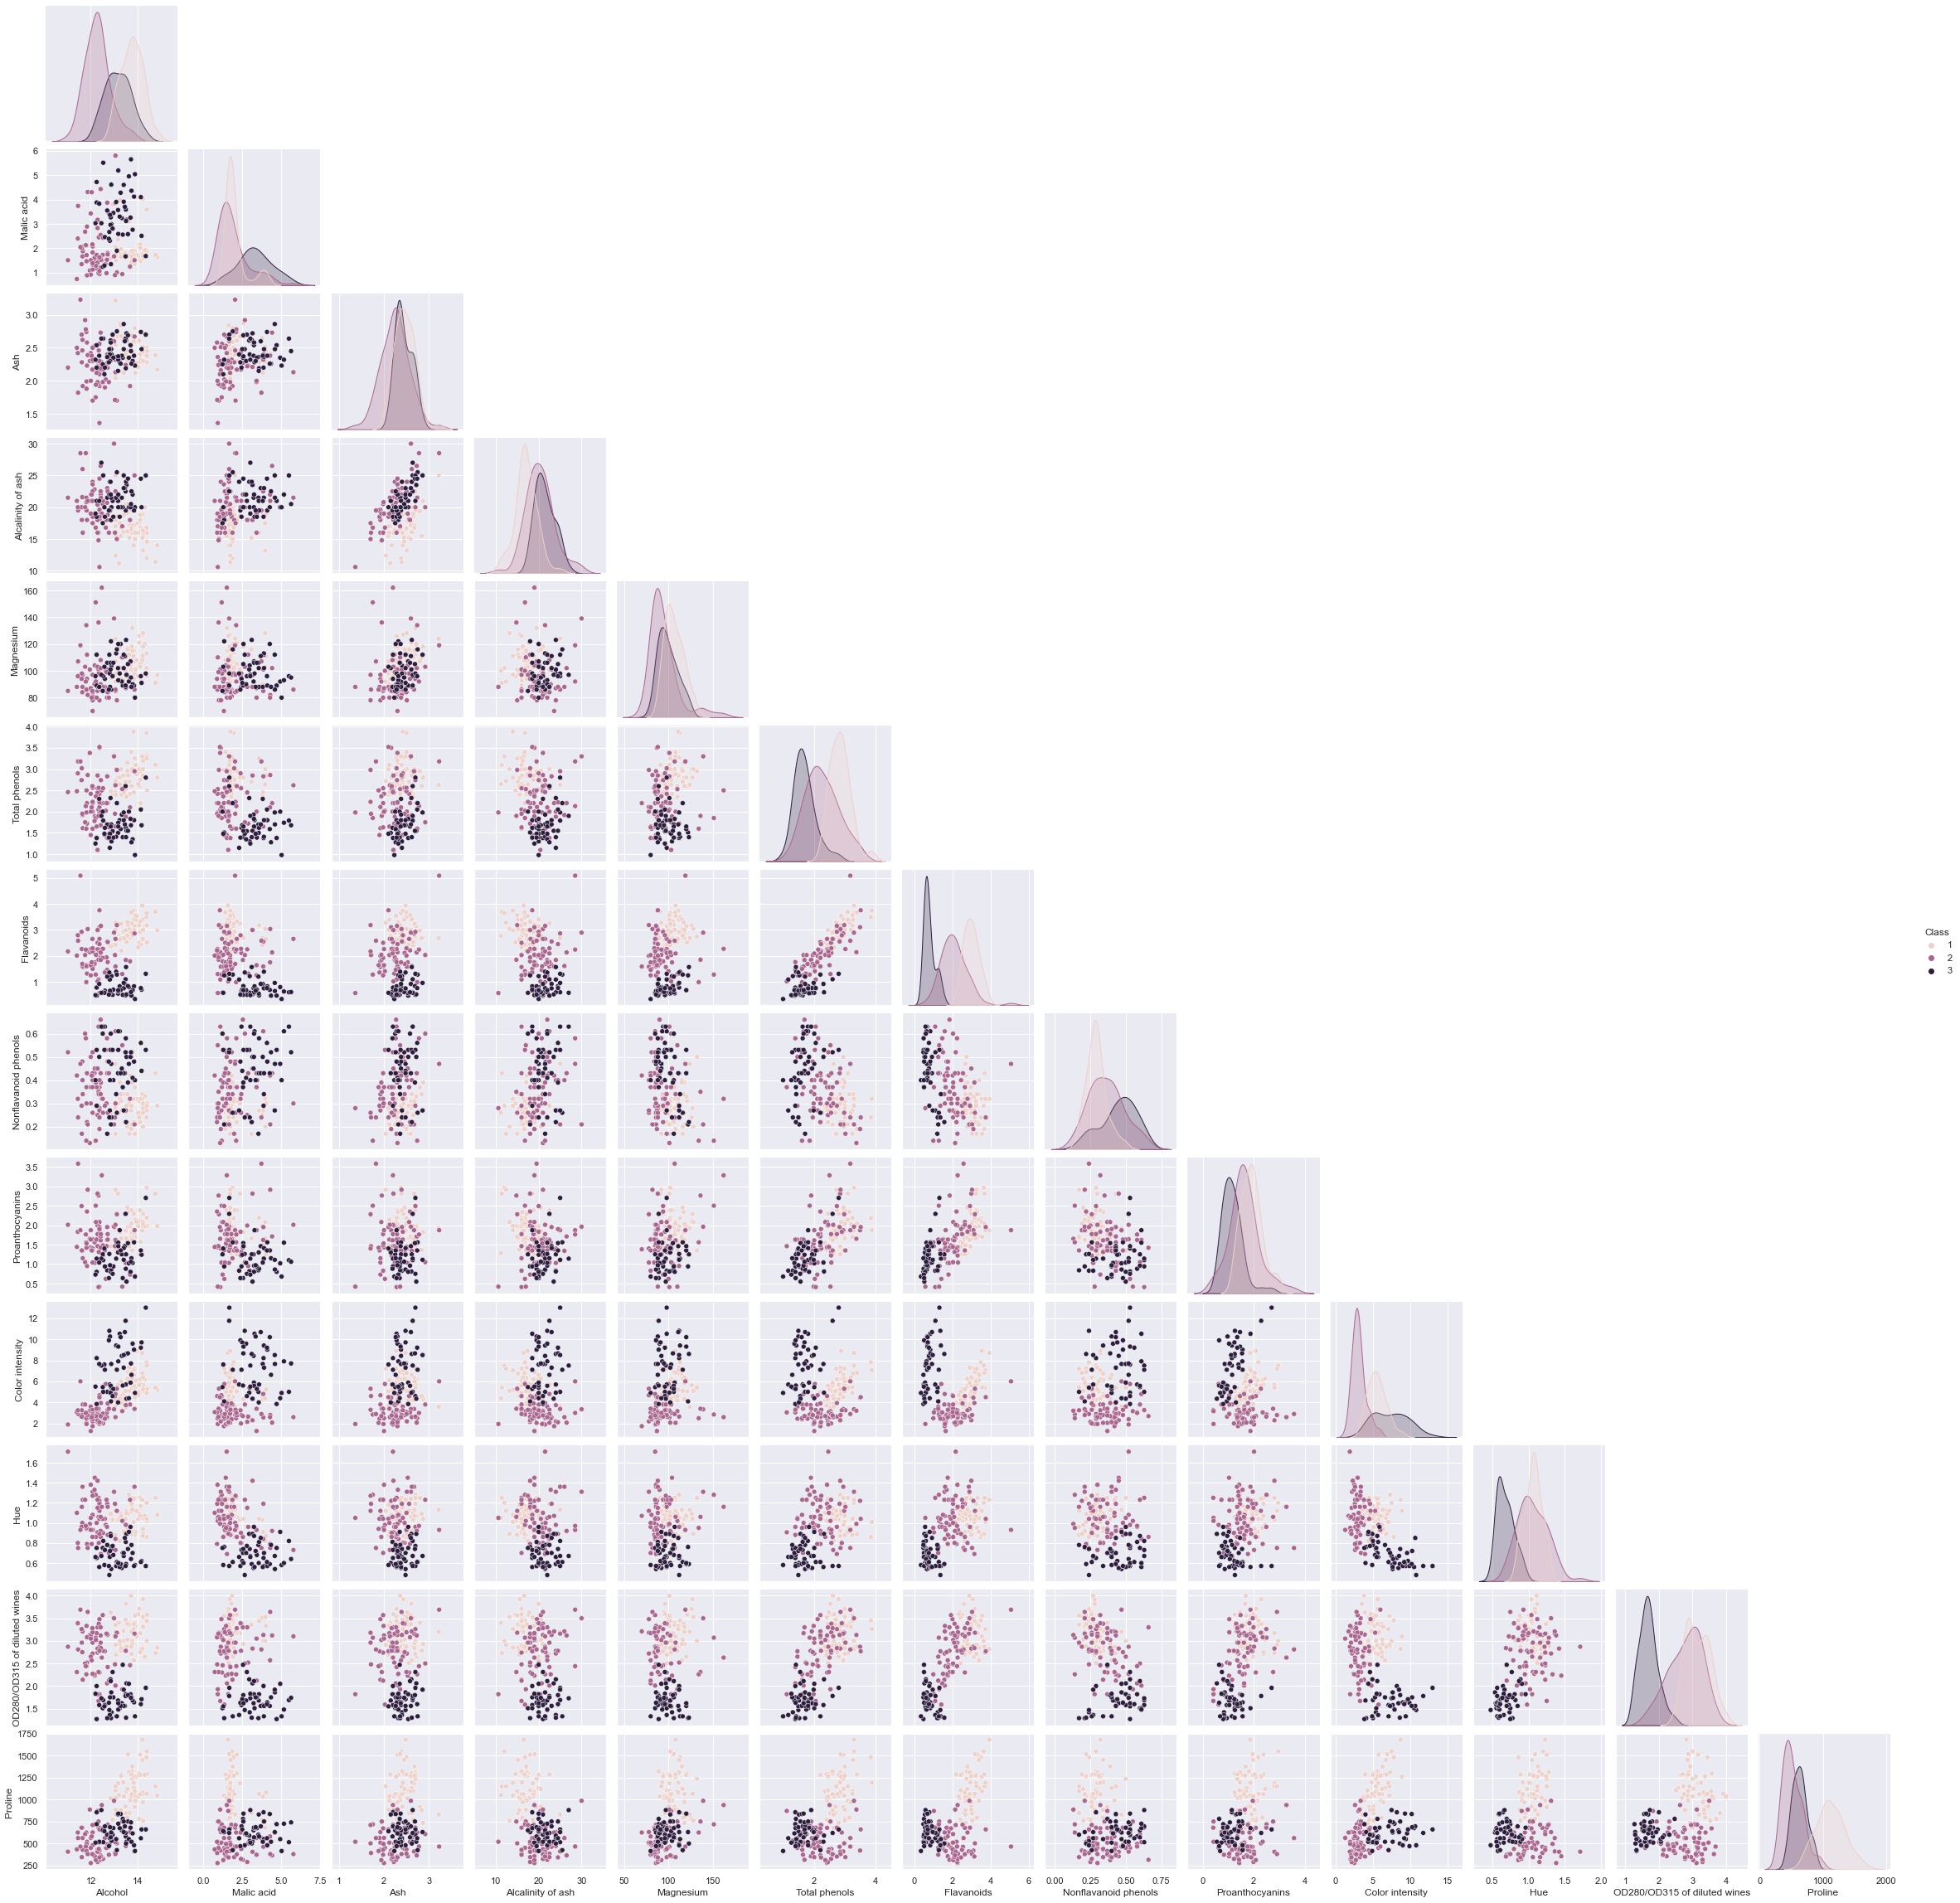

In [11]:
sns.set(rc = {'figure.figsize':(50,50)})
sns.pairplot(data=df,hue = 'Class',corner = True)

### Observations - 
- We observe non linear decision boundaries. This problem can be solved using MLP Classifier, since it excels at learning non-linear decision boundaries.  
- Presence of outliers is observed.Luckily enough MLP automatically ignores these outliers (or noise).  
- We do observe multicollinearity.But Once Again, my MLP model should be reasonably good at overcoming this. Its weights and biases already lack interpretability == >  
#### That is, at each level of the network, the inputs are linear combinations of the inputs of the previous level. The final output is a functions of very many combinations of sigmoidal functions involving high order interactions of the original predictors. Thus neural networks guard against the problems of multicollinearity at the expense of interpretability.

### 3.Perform  the  required  preprocessing  ,  70,30  split  and  build  a  classifier  using the Multi-Layer  Perceptron  Classifier  modelavailable  in  SciKit  Learn. Use 3  layers with  the  same  number  of  neurons  as  there  are  features  along  with  500  max iterations.

In [12]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

%matplotlib inline

## Building Model Pipelines  
### Feature Scaling
- Scaling of data should help speed up computations and speed up learning.

### Multi Layer Perceptron
- Given the small size of dataset, it is important that Neural Network is simple so it does not overfit the dataset.
- Model has 3 layers ( 1 Input , 1 Hidden , 1 Output).
- Input layer has 13 Input Neurons
- Hidden layer has 13 Densely Connected Neurons
- Output layer has 3 Neurons for 3 Classes

In [13]:
model = Pipeline([
    ('Scaler',StandardScaler()),
    ('MLPClassifier',MLPClassifier(hidden_layer_sizes=(len(df.columns)-1,),random_state=42,
                                    learning_rate_init=0.01,
                                    max_iter=500,
                                    ))
])

In [14]:
X = df.drop(columns='Class')
y = df['Class']

In [15]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,random_state=42)

Running 10-fold cross validation

In [17]:
scores = cross_val_score(estimator=model,
                         X = X_train,
                         y = y_train,
                         cv=10)

In [18]:
print("Average Accuracy over 10 Cross Folds is : {0:.2f}%".format(100*scores.mean()))

Average Accuracy over 10 Cross Folds is : 95.96%


## Model Fitting

In [20]:
model.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('MLPClassifier',
                 MLPClassifier(hidden_layer_sizes=(13,),
                               learning_rate_init=0.01, max_iter=500,
                               random_state=42))])

## Model Evaluation

In [21]:
print("Accuracy over Test Set is : {0:.2f}%".format(100*model.score(X_test,y_test)))

Accuracy over Test Set is : 100.00%


### 4.Tabulate the precision, recall and F1-score.

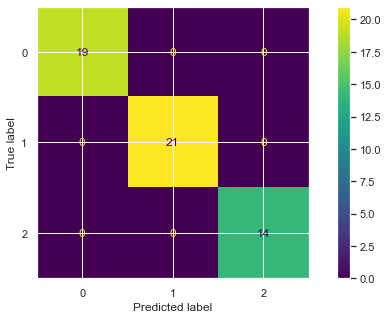

In [30]:
cm = confusion_matrix(y_true=y_test,y_pred=model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [24]:
print(classification_report(y_test, y_pred = model.predict(X_test), labels = [2,4],zero_division=0,))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        21
           4       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        21
   macro avg       0.50      0.50      0.50        21
weighted avg       1.00      1.00      1.00        21



## Model Loss Curve

<AxesSubplot:>

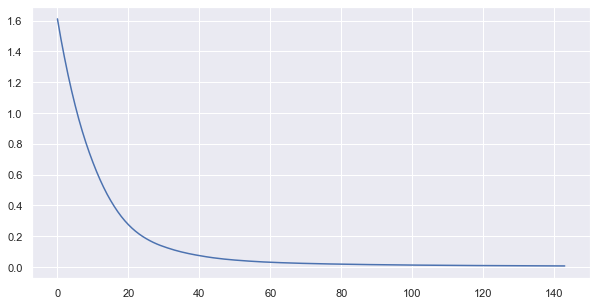

In [25]:
loss_curve = model['MLPClassifier'].loss_curve_
sns.lineplot(data = loss_curve)

The loss curve plateaus after 60 iterations

### 10.Display the MLP weights and biases after training your model.

Model Weights & Bias

In [34]:
model_wts = model['MLPClassifier'].coefs_
bias = model_wts[1]
w = model_wts[0]

Model Bias Terms for 3 Layers

In [32]:
bias

array([[ 0.07740031,  0.96220693, -0.88171523],
       [-0.16188869,  0.09918473,  0.39081472],
       [ 0.43937459, -0.76047548, -0.53604096],
       [ 0.88446058,  0.09297717, -0.23294598],
       [-0.57267928, -0.41144926,  0.75250848],
       [ 0.18652043,  0.91525692,  0.35128078],
       [-0.02357395, -0.29583427, -0.65198309],
       [ 0.96520881, -0.33865023, -1.09089727],
       [-0.76987469,  0.74267262, -1.08442967],
       [-0.27543459, -0.34342546,  0.41432128],
       [ 0.61612672, -0.21736881,  0.01435258],
       [-0.78366339,  0.17077021, -0.01432909],
       [-0.14335428,  0.63290856,  0.38866019]])

Model Weights for 13 Neurons of Hidden layer

In [35]:
w

array([[-5.03319211e-01,  1.53459927e-01,  6.65448630e-01,
         4.96021097e-01,  4.45662031e-02, -7.72804934e-01,
        -2.09857356e-01,  6.89506798e-01, -3.22503734e-01,
         3.65857215e-02, -1.63970854e-01, -1.17714806e-01,
        -9.52497251e-02],
       [-2.38410824e-01, -4.53348785e-01, -4.35784007e-01,
        -1.44348032e-01,  3.25096116e-01, -2.34109401e-01,
         3.27256063e-02,  4.02112443e-02, -1.59862732e-01,
         9.06133910e-02,  4.11198806e-01, -4.67960519e-01,
         2.10979705e-01],
       [-8.40637766e-01, -1.68184233e-01,  5.66327566e-01,
         1.18835873e-01,  5.56141356e-01, -8.13983545e-01,
        -2.01654115e-01,  8.58346544e-01,  1.82458310e-01,
         2.70593254e-01, -3.13540266e-02, -7.47180680e-01,
        -1.83338395e-01],
       [ 3.86016811e-01, -3.73909308e-01, -4.37068802e-01,
        -7.78002523e-01,  6.15447896e-01,  1.36537601e-01,
         7.84101946e-04, -5.32406882e-01,  5.09676803e-01,
         2.48559196e-01, -7.23457198e

# EX2

### 1.Write down the meta information about the “cancer.csv” data set available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pages 570-577, July-August 1995.

Medical literature:

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian. 
	Machine learning techniques to diagnose breast cancer from
	fine-needle aspirates.  
	Cancer Letters 77 (1994) 163-171.

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian. 
	Image analysis and machine learning applied to breast cancer
	diagnosis and prognosis.  
	Analytical and Quantitative Cytology and Histology, Vol. 17
	No. 2, pages 77-87, April 1995. 

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. 
	Computerized breast cancer diagnosis and prognosis from fine
	needle aspirates.  
	Archives of Surgery 1995;130:511-516.

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. 
	Computer-derived nuclear features distinguish malignant from
	benign breast cytology.  
	Human Pathology, 26:792--796, 1995.

See also:
	http://www.cs.wisc.edu/~olvi/uwmp/mpml.html
	http://www.cs.wisc.edu/~olvi/uwmp/cancer.html

Results:

	- predicting field 2, diagnosis: B = benign, M = malignant
	- sets are linearly separable using all 30 input features
	- best predictive accuracy obtained using one separating plane
		in the 3-D space of Worst Area, Worst Smoothness and
		Mean Texture.  Estimated accuracy 97.5% using repeated
		10-fold crossvalidations.  Classifier has correctly
		diagnosed 176 consecutive new patients as of November
		1995. 

4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569 

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

8. Missing attribute values: none

9. Class distribution: 357 benign, 212 malignant

In [37]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [51]:
df.diagnosisgnosis.unique()

array(['M', 'B'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df.dropna(axis=1,inplace=True)# Dropping the last column

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 2.Tabulate and visualize the distribution of the numeric variables.

In [70]:
df.replace({'M': 1, 'B': 0},inplace=True)

In [ ]:
sns.set(rc = {'figure.figsize':(50,50)})
sns.pairplot(data=df,hue = 'diagnosis',corner = True)
plt.plot()

### 3.Perform the required preprocessing , 70,30 split and build a classifier using the SVMmodelavailable in SciKit Learn.

In [50]:
para_dict = {
    'C' : list(range(1,10)),
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : list(range(1,5)),
    'gamma' : ['scale','auto']
}

In [54]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

model_para_search = Pipeline([
    ('Scaler',StandardScaler()),
    ('GridSearchCV',GridSearchCV(
                                estimator=SVC(),
                                param_grid=para_dict,
                                refit=True,
                                cv = 10,
                                return_train_score=True))
])

In [57]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
X_train , X_test , y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.7)

### 4. Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset.

In [59]:
model_para_search.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('GridSearchCV',
                 GridSearchCV(cv=10, estimator=SVC(),
                              param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                          'degree': [1, 2, 3, 4],
                                          'gamma': ['scale', 'auto'],
                                          'kernel': ['linear', 'poly', 'rbf']},
                              return_train_score=True))])

In [61]:
best_params = model_para_search['GridSearchCV'].best_params_
best_params

{'C': 7, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [62]:
model = Pipeline([
    ('Imputer',KNNImputer()),
    ('Scaler',StandardScaler()),
    ('SVC',SVC(**best_params))
])#Model using best params

In [63]:
scores = cross_val_score(estimator=model,
                         X=X_train,y=y_train,
                         cv=10)
print("Accuracy Obtained : {0:.2f}%".format(100*scores.mean()))

Accuracy Obtained : 97.49%


In [64]:
model.fit(X_train,y_train)

Pipeline(steps=[('Imputer', KNNImputer()), ('Scaler', StandardScaler()),
                ('SVC', SVC(C=7, degree=1, kernel='poly'))])

In [65]:
print("Accuracy Obtained : {0:.2f}%".format(100*model.score(X_test,y_test)))

Accuracy Obtained : 98.25%


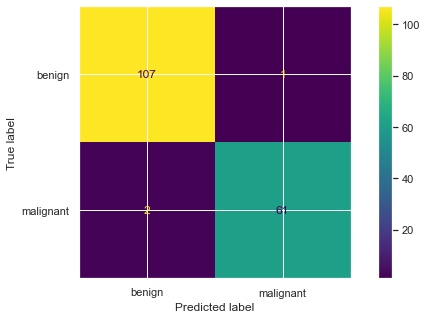

In [67]:
cm = confusion_matrix(y_true=y_test, 
                      y_pred=model.predict(X_test))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(rc = {'figure.figsize':(10,5)})
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['benign','malignant']).plot()